<a href="https://colab.research.google.com/github/mrklees/PracticalStatistics/blob/master/1_Exploratory_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Visualization

Goals for this Session:
* Participants will learn how to interpret common statistical graphs including: histograms, box-and-whisker plots, kernel-density estimates, and scatter plots. 
* Participants will become familiar with the language of expected value and variance, and will begin to build some intuition about how they appear in visualization. 

Visualization will be central to how we approach statistical ideas in this series, and thus we will spend the entire first session talking about the visualizations which function as core tools when trying to understand data from a statistical perspective.  

### Quick Note About This Environment

For most of you, this will be the first time using Colab or Jupyter Notebooks.  A few things to know.  This environment is designed to use the Python programming language to work with data.  You can write code in a cell, and the run the cell by pressing the play button in the top right of the cell (or press shift+enter) to see the result.  You'll no doubt get the hang of the environment quite quickly with just a little time and practice. 

We chose to work in this environment because it removes the need for you to manage installing the environment yourself, and lets you get started very quicky.  **For those who aren't interested in diving into learning to program, that's okay!** These notebooks are designed to be run straight through without you needing to touch the code, so engage with the code as much or as little as you would like.  Alot of what we'll do can be recreated in Power BI! For our purposes, it is really a side point to the main goal of learning a little bit about statistics and how to practically apply that knowledge in our work. 

In [0]:
#@title Imports and Global Variables (run this cell first)  { display-mode: "form" }
"""
The book uses a custom matplotlibrc file, which provides the unique styles for
matplotlib plots. If executing this book, and you wish to use the book's
styling, provided are two options:
    1. Overwrite your own matplotlibrc file with the rc-file provided in the
       book's styles/ dir. See http://matplotlib.org/users/customizing.html
    2. Also in the styles is  bmh_matplotlibrc.json file. This can be used to
       update the styles in only this notebook. Try running the following code:

        import json
        s = json.load(open("../styles/bmh_matplotlibrc.json"))
        matplotlib.rcParams.update(s)
"""
#@markdown This sets the warning status (default is `ignore`, since this notebook runs correctly)
warning_status = "ignore" #@param ["ignore", "always", "module", "once", "default", "error"]
import warnings
warnings.filterwarnings(warning_status)
with warnings.catch_warnings():
    warnings.filterwarnings(warning_status, category=DeprecationWarning)
    warnings.filterwarnings(warning_status, category=UserWarning)

import numpy as np
import pandas as pd
import os
#@markdown This sets the styles of the plotting (default is styled like plots from [FiveThirtyeight.com](https://fivethirtyeight.com/))
matplotlib_style = 'fivethirtyeight' #@param ['fivethirtyeight', 'bmh', 'ggplot', 'seaborn', 'default', 'Solarize_Light2', 'classic', 'dark_background', 'seaborn-colorblind', 'seaborn-notebook']
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
%matplotlib inline
import seaborn as sns; sns.set_context('notebook')

In [0]:
#@title Importing the Data
url = 'https://impactblob.blob.core.windows.net/public/teacheranon.csv'
teachers = pd.read_csv(url)
teachers = teachers.dropna()
#@markdown As a handy reference, here are all the columns in the data.
list(teachers.columns)

['site_ix',
 'Grade Lvl Index',
 'Grade Level Cohort',
 '18. What is your primary school responsibility? Select one that best applies',
 '20. Did you request a corps member this year?',
 '21. How many years prior to this academic year have you had one or more corps me',
 '22. At the start of year, did you and your corps member(s) meet to discuss expec',
 '23. Are you responsible for a class or homeroom with an assigned corps member?',
 "24. I feel well informed about City Year's mission and goals :To what extent do ",
 '25. My corps member(s) and I have established clear expectations for their work ',
 "26. I am familiar with City Year's approach to instructional support :To what ex",
 '27. meet to discuss the performance of the students with whom they are working :',
 '28. review student level data (course grades, assessments, progress monitoring d',
 '29. discuss corps member(s) performance :Please indicate how often you and your ',
 "30. set aside time on a consistent basis to colla

# Time to Get Oriented

After running the first cell our data is stored in a dataframe called `teachers`, and with that done it is time to get oriented and start to explore the data. We come to data with lots of different types of goals.  Sometimes they're exploratory (what is x?), sometimes they're experimental (does x cause y?), sometimes they're predictive (given past x, what will future x be?), but *no matter our goal* the first things we want do is analyze a few basic properties of the data: 

* **What is the typical outcome in the data?**
* **What is the possible range of outcomes? What do extreme outcomes in the data look like? **

## The Histogram & Kernel Density Estimation

For nearly any numeric data the histogram is an excellent starting point.   Histograms is created by binning your data into categories and counting the number of datapoints that fall into those categories.  A bar chart is then constructed where the height of the bar is proportional to the number of datapoints in that category. 

Kernel Density Estimation is a common technique used to approximate the distribution of a variable. As we'll see in the example below, it complements the histogram nicely. 

As you can observe in the cell below, generating a histogram for one or even several variables doesn't require more than a single line of code. 

Histograms allow us to visually guess at answers to both questions above.  

**What is the average outcome in the data?**
Taking a look at a histogram like the one of question 74, the NPS question, we can see from the towering bar that most teachers responded with a 10.  This is often called the mode of the distribution. We don't know what the average outcome is exactly, but we could hypothesize pretty easily that it's going to be close to 10.  

The average is often also called **mean** or **expected value**.

**What is the possible range of outcomes? What do extreme outcomes in the data look like? **

The histogram gives a very good idea of the shape of the data, allowing us to see how likely alternative outcomes are besides the most popular one. We can observe in the NPS histogram that while most teachers respond with a ten, there are teachers who have given us every possible rating down to a 0.  We might note, for example, that there is a moderate cluster of respondants who give a 5, 6, 7 as opposed to a very small cluster of teachers who rate us lower than that. 

When we talk about this, we will frequently talk about the **variance** of the data.  We'll define this more precisely later, but for now it is sufficient to think of the variance of the data as how spread out the possible outcomes are.  The more spread out the data, the greater the variance. This will become more concrete when we start to compare distributions a little later. 

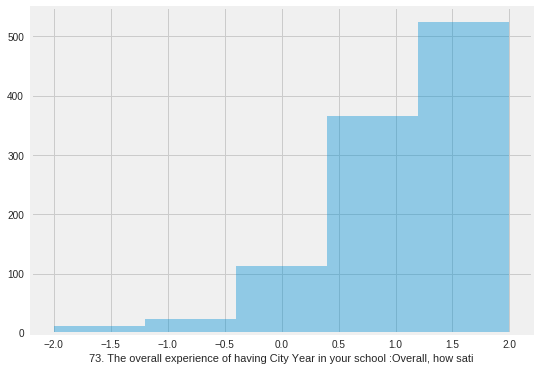

In [0]:
#@title The Histogram {run: 'auto'}
#@markdown Select a column to visualize then run the cell.
col = "73. The overall experience of having City Year in your school :Overall, how sati" #@param ["site_ix", "Grade Lvl Index", '71. The quality of service provided by your corps member(s) :Overall, how satisf', '72. The overall impact of City Year on your class/students :Overall, how satisfi', '73. The overall experience of having City Year in your school :Overall, how sati', '74. On a scale of 0 to 10, with 0 representing extremely unlikely and 10 represe']

hist = True #@param ["True", "False"] {type:"raw"}
bins = 5 #@param {type:"slider", min:1, max:20, step:1}
kde = False #@param ["True", "False"] {type:"raw"}
rug = False #@param ["True", "False"] {type:"raw"}

f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(teachers[col], bins=bins, hist=hist, kde=kde, rug=rug, ax=ax)

In [0]:
dir(f)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_align_xlabel_grp',
 '_align_ylabel_grp',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_constrained',
 '_constrained_layout_pads',
 '_contains',
 '_dpi',
 '_gci',
 '_get_axes',
 '_get_dpi',
 '_gid',
 '_gridspecs',
 '_in_layout',
 '_label',
 '_layoutbox',
 '_make_key',
 '_mouseover',
 '_oid',
 '_path_effects',
 '_picker',
 '_prop_order',
 '_propobservers',
 '_rasterized',
 '_remove_ax',
 '_remove_method',
 '_repr_html_',
 '_set_artist_props',
 '_set_dpi',
 '_set_gc_clip',
 '_sketch',
 '_snap',
 '_stale',
 '_sticky_e

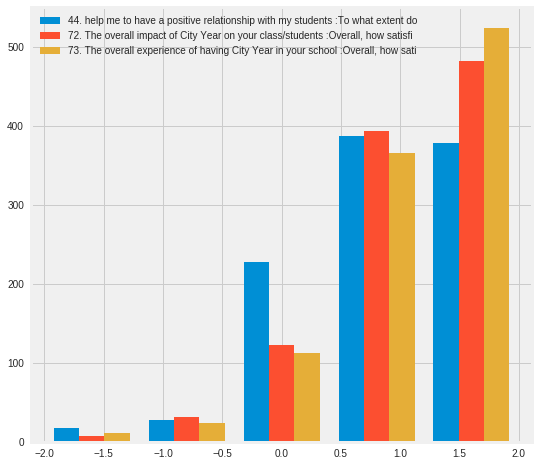

In [0]:
#@title ### Comparing Different Questions
#@markdown The histogram can really struggle to show multiple distributions in a way that enables you to draw meaning. Like in the graph below, we try to compare three different questions. I personally find it a bit hard to read. 

qs = teachers[['44. help me to have a positive relationship with my students :To what extent do ',
               '72. The overall impact of City Year on your class/students :Overall, how satisfi',
               '73. The overall experience of having City Year in your school :Overall, how sati']]

f1, ax1 = plt.subplots(figsize=(8, 8))

ax1.hist(qs.values, label=qs.columns, bins=5)
ax1.legend(loc='upper left')


#### Comparing Subgroups

In this case I am trying to compare the responses to the overall experience question based on their prior experience with City Year.  There are 5 different groups, and we can see from the histogram that there is some differences between them.  

However there are still some problems. 

First, the number of responses per subgroup aren't equal so the bigger subgroups (between 0 and 4 years) dominate the graph as a result.  By turning the density parameter on we account for this fact by changing the y-axis from the count of data points in that bin to a measurement of density to the percentage of the dataset accounted for by that bin. Thus we can see the y-axis is now between 0 and 1. 

Readability also remains a concern with this plot.  This view really maximizes our ability to compare the numbers of responses for each category, but doesn't so easily allow us to compare the statistical properties which we were original analyzing (the typical outcomes and the range of possible outcomes). 

When comparison is your goal, its time to start looking into the box-and-whisker plot (or box plot for short). 

['0 years' '1 year' '2-4 years' '5-7 years' 'More than 7 years']


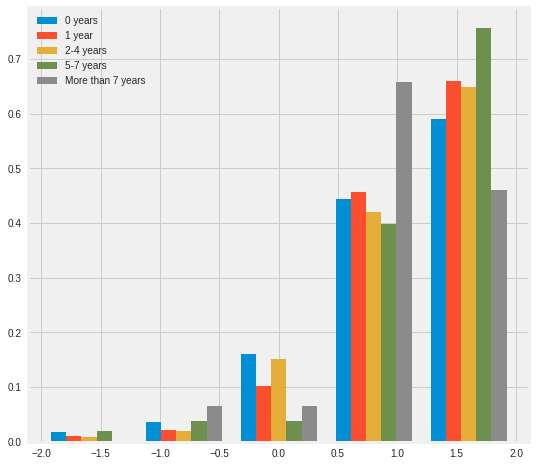

In [0]:
# Storing these in variables just because they are so long
q = '73. The overall experience of having City Year in your school :Overall, how sati'
grouping_q = '21. How many years prior to this academic year have you had one or more corps me'

# Get a df of just the data I want
df = teachers[[q, grouping_q]].dropna()
grouping = df[grouping_q].unique()
grouping.sort()

print(grouping)

# This is a Python List Comprehension.  It's a nice piece of shorthand to 
# replace a longer for loop.  We're using it here to extract the data associated
# with each group and store all 5 of those dataframes in a list which we can
# give to matplotlib. 
d = [df[df[grouping_q] == group][q] for group in grouping]

#@markdown Turn density on to account for sample size
density = True #@param ["False", "True"] {type:"raw"}\
# Plot it!
f, ax = plt.subplots(figsize=(8, 8))
ax.hist(d, bins=5, density=density)
ax.legend(grouping)
plt.show()

## Box-and-Whisker Plots

Box-and-whisker plots, or box plots for short, excel at comparing similar distributions.  While you sacrifice a certain amount of detail, as the box plot reduces the input dataset down to largely a handful a datapoints, this allows you to easily compare different subgrouping.  The below chart sumarizes the components of a box plot.

![https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51](https://cdn-images-1.medium.com/max/800/1*2c21SkzJMf3frPXPAR_gZA.png)

The boxplot allows us two really easy measures of the expected value and the variance.  Because the center line (yellow above) is the median, we would often guess that the mean of the data will be close to it.  Note that, the mean is typically not the same as the medium, but it's a useful approximation to be able to see visually.  We also get a nice picture of the variance, both by how far out the first and third quartiles are, but also by how far out the maximum and minumum bars are.  





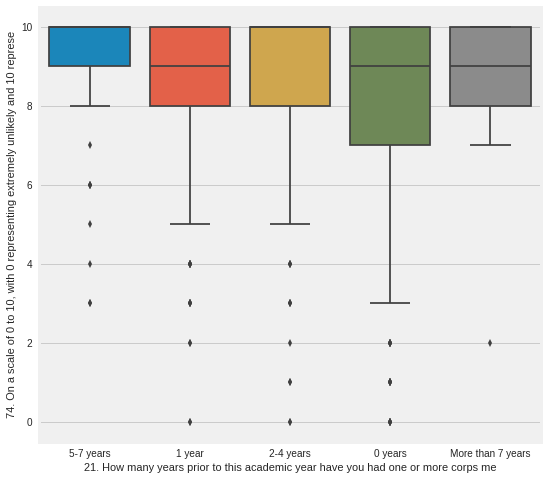

In [0]:
#@title ### Comparing Subgroups
#@markdown Where the histogram struggled to compare subgroups, the boxplot really shines.
#@markdown Consider the expected values and variances of the distributions below.  How do they compare?
q = "74. On a scale of 0 to 10, with 0 representing extremely unlikely and 10 represe"
grouping_q = '21. How many years prior to this academic year have you had one or more corps me'

f, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(x=grouping_q, y=q, data=teachers, ax=ax)

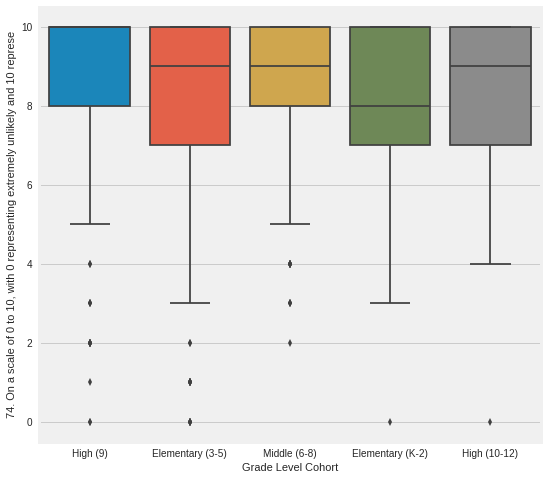

In [0]:
grouping_q = 'Grade Level Cohort'
q = "74. On a scale of 0 to 10, with 0 representing extremely unlikely and 10 represe"
f, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(x=grouping_q, y=q, data=teachers, ax=ax)

### Comparing Multiple Questions
The boxplot really excels at comparing different variables as well. In this case we're easily able to compare the distributions of 3 different questions. 

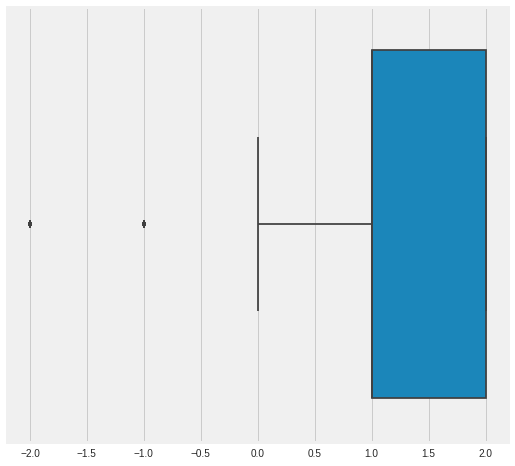

In [0]:
qs = ['44. help me to have a positive relationship with my students :To what extent do ',
               '72. The overall impact of City Year on your class/students :Overall, how satisfi',
               '73. The overall experience of having City Year in your school :Overall, how sati']
f, ax = plt.subplots(figsize=(8, 8))
# This worked in older versions... I think it's a bug?
sns.boxplot(x=qs, orient='h', data=teachers)

In our next session we shall dive into problem of comparing different distributions with our focus on statistical tests. 

## Scatter Plots

Admittedly this data isn't super great for scatter plots, but we can get more than a sufficient picture.  In fact, I'm confident that you all have seen scatter plots at some point in your education career. 

For our purposes, they are useful because they allow for the direct comparison of two or three variables.  That said, our guiding questions don't change.  We are still interested in the expected value and the variance.  This time, however, it is not of either individual alone, but of the relationship between the two that we are probing. 

The relationship is easily visualized when we allow the graph to include the line of best fit.  The dark center of that is the expected value of that relationship between variable X and Y. The lighter color expresses the *variance* or *uncertainty* in what the true line is. Don't worry too much about the details here.  Where that line comes from or why there's the shaded area is a question for another day.

What is important is how to interpet the graph.  Each point, of course, is one of the data points that we fed to the graph.  The line is calculated from the data automatically. This line can be thought of as the correlation between the two variables X and Y. If, as you see below, the line goes from the bottom left to the top right, that is a possible correlation.  Otherwise, if it heads from top left to bottom right then the correlation is negative. 

Again, we'll talk more about correlation once we get into regression in session 3 so it's not terribly important to understand much more than what's positively correlated and what's negatively correlated. 

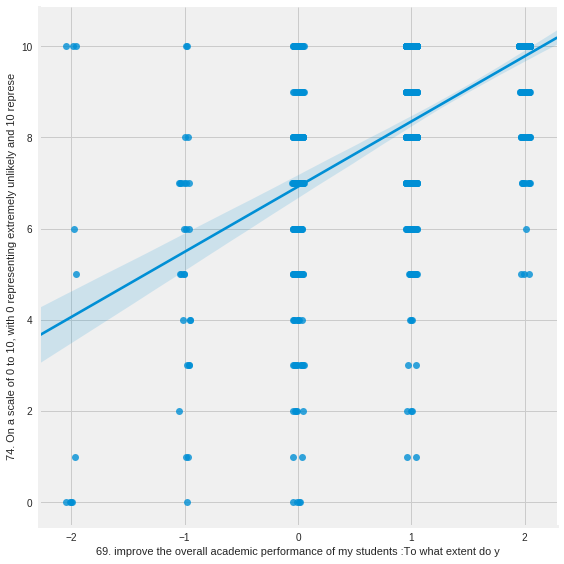

In [0]:

q1 = '69. improve the overall academic performance of my students :To what extent do y'
q2 = "74. On a scale of 0 to 10, with 0 representing extremely unlikely and 10 represe"
subgroup = '' #@param ["", "20. Did you request a corps member this year?", '21. How many years prior to this academic year have you had one or more corps me', 'Grade Level Cohort']

fit_linear = True #@param ["True", "False"] {type:"raw"}
jitter = 0.05 #@param ["0", "0.05", "0.1"] {type:"raw"}
if subgroup == '':
    sns.lmplot(x=q1, y=q2, data=teachers, fit_reg=fit_linear, x_jitter=jitter, size=8 )
else:
    sns.lmplot(x=q1, y=q2, hue=subgroup, data=teachers, fit_reg=fit_linear, x_jitter=jitter, size=8 )

# Combining Scatter Plots and Histograms

The scattermatrix can be a bit unweildy, but if there aren't too many variables can be a useful tool for exploring an entire dataset at once.

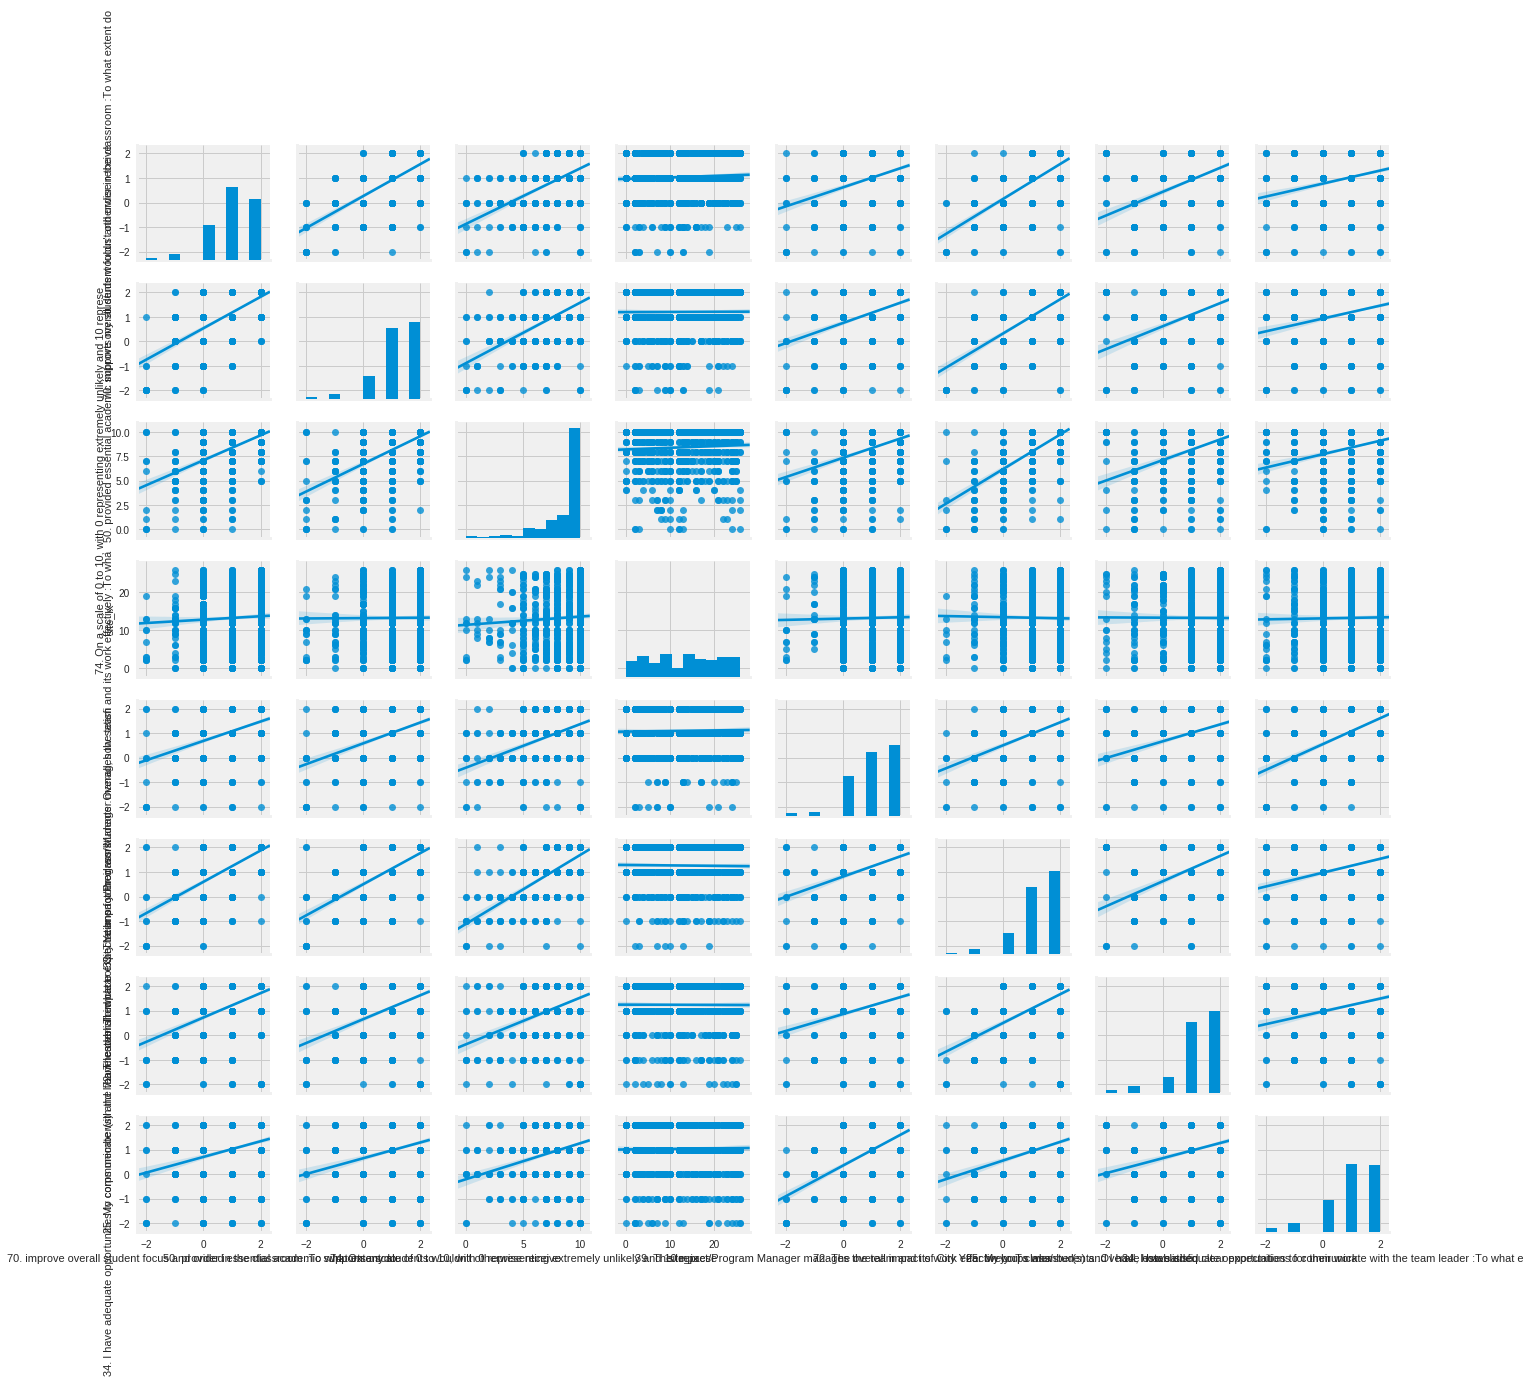

In [0]:
cols = pd.Series(teachers.columns).sample(10)
sns.pairplot(teachers[cols], kind='reg', diag_kind='hist')

# Coming Up

In session 3 will will deep dive into how those lines are created and what meaning we can start to derive from them. 

## Feedback Please!

[Please take 2 minues to give me some feedback!](https://forms.office.com/Pages/ResponsePage.aspx?id=n4nHpSnR9kisiI-X82badMFC4tEHX8lCm8qe3Orb0kdUQkw2TkQxUFJEWjlCRElPVlJQWktVRlQ0QiQlQCN0PWcu)